### 載入工具

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 資料：訓練集、標籤集

(13, 1)


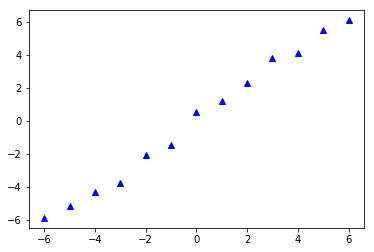

In [2]:
np.random.seed(1)

# fake data 1
x_train = np.array([[-6], [-5], [-4], [-3], [-2], [-1], [0], [1], [2], [3], [4], [5], [6]], np.float32)
y_train = np.array([[-5.9], [-5.2], [-4.3], [-3.8], [-2.1], [-1.5], [0.5], [1.2], [2.3], [3.8], [4.1], [5.5], [6.1]], np.float32)

# fake data 2
# x_train = np.linspace(-6, 6, 100)[:, np.newaxis]
# noise = np.random.normal(0, 3, size=x_train.shape)
# y_train = np.power(x_train, 2) + noise

# fake data 3
# x_train = np.linspace(-100, 100, 200)[:, np.newaxis]/(5*np.pi)
# noise = np.random.normal(0, 0.1, size=x_train.shape)
# y_train = np.sin(x_train) + noise

# draw
plt.figure()
plt.plot(x_train, y_train, "b^")
print(x_train.shape)

### 建構 Tensorflow 的 Graph

In [3]:
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

layer1 = tf.layers.dense(inputs=x, units=10, activation=tf.nn.relu)
layer2 = tf.layers.dense(layer1, 20, tf.nn.relu)
layer3 = tf.layers.dense(layer2, 40, tf.nn.relu)
predict = tf.layers.dense(layer3, 1)
loss = tf.losses.mean_squared_error(labels=y, predictions=predict)
train = tf.train.GradientDescentOptimizer(learning_rate=0.003).minimize(loss)

### 創建 Session、初始變數、開始訓練

loss:  14.745614


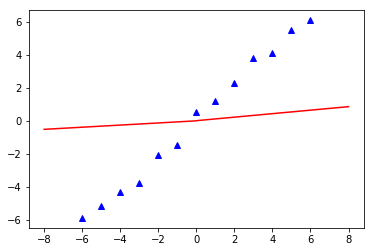

loss:  0.06623268


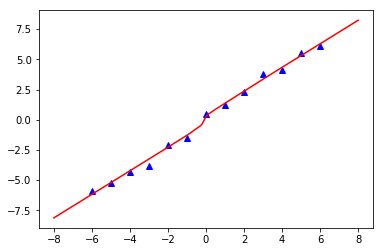

loss:  0.057379346


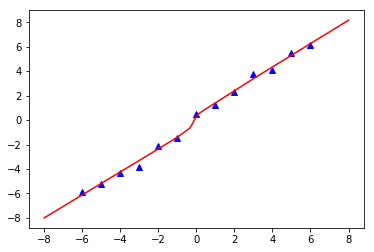

loss:  0.054030802


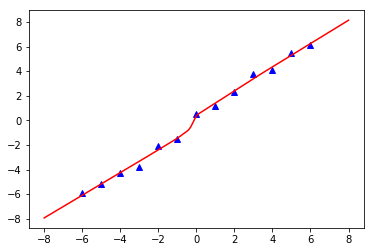

loss:  0.052127317


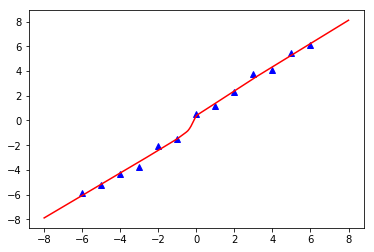

loss:  0.051119667


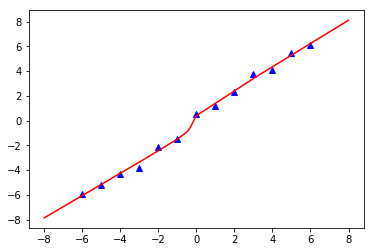

loss:  0.050313994


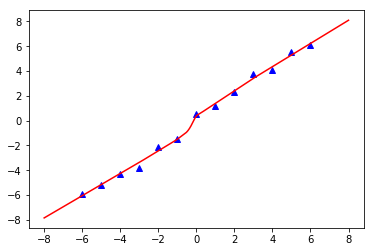

loss:  0.049521472


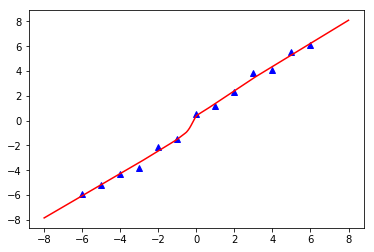

loss:  0.048703153


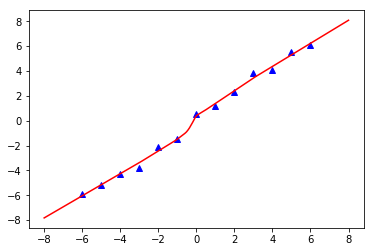

loss:  0.047849976


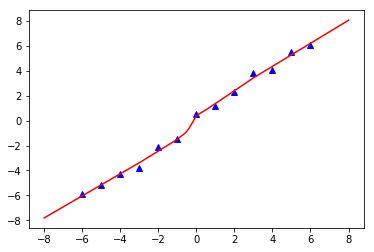

loss:  0.04695289


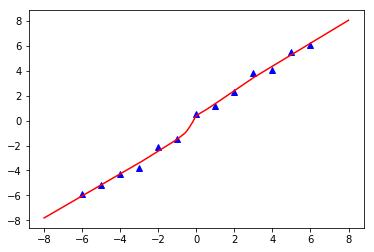

loss:  0.0459937


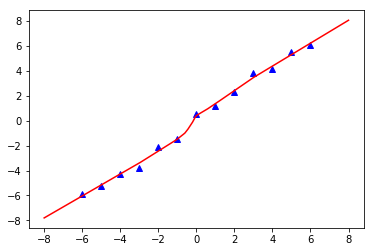

loss:  0.045075867


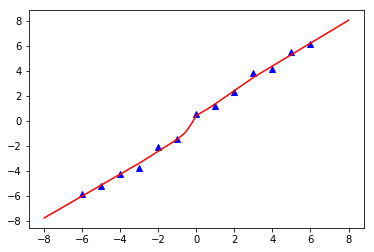

loss:  0.044115007


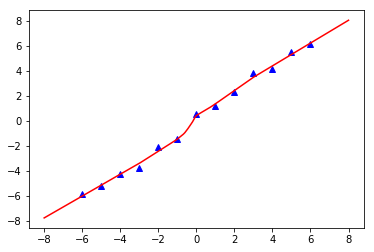

loss:  0.04310655


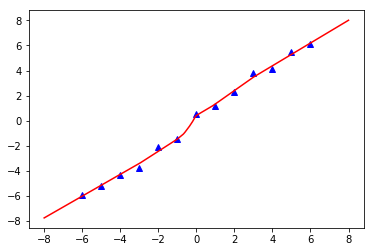

loss:  0.042094752


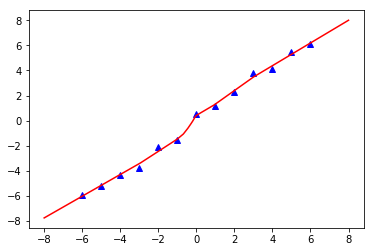

loss:  0.04107093


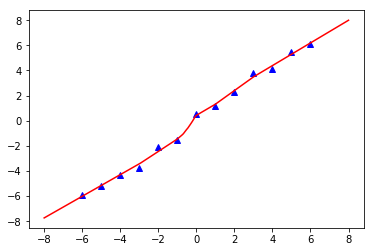

loss:  0.040032156


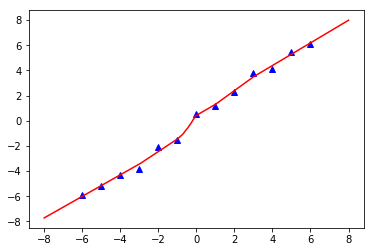

loss:  0.038770016


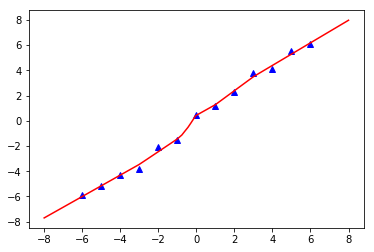

loss:  0.037738733


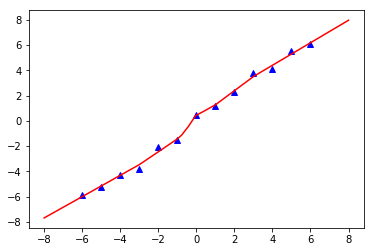

loss:  0.03688994


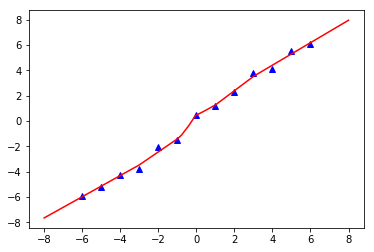

loss:  0.036117874


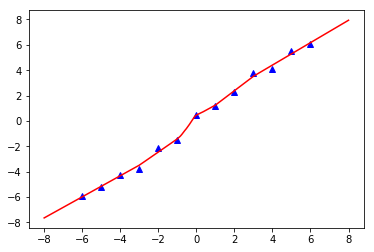

loss:  0.035454903


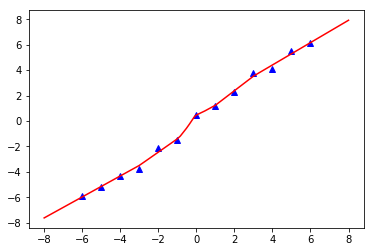

loss:  0.034850296


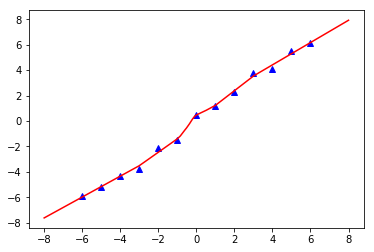

loss:  0.034335863


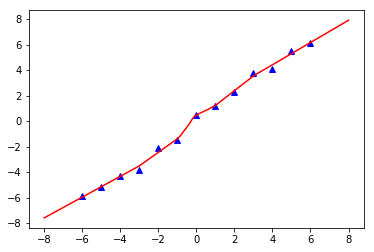

loss:  0.03393402


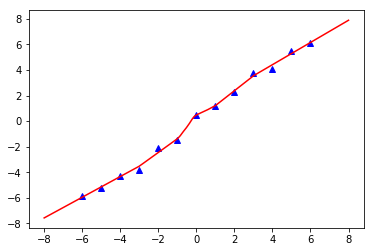

loss:  0.033606067


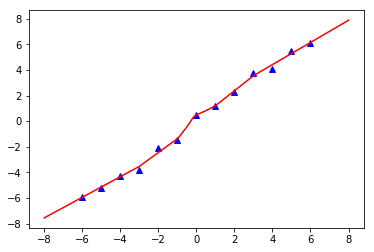

loss:  0.033313934


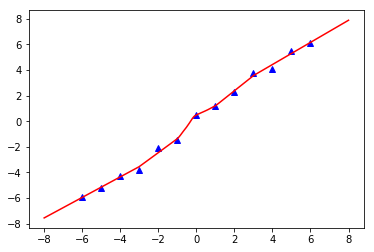

loss:  0.03308738


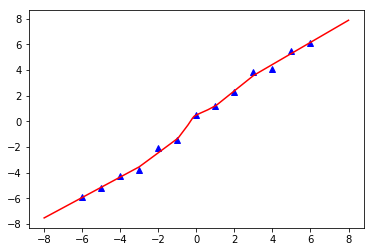

loss:  0.032896318


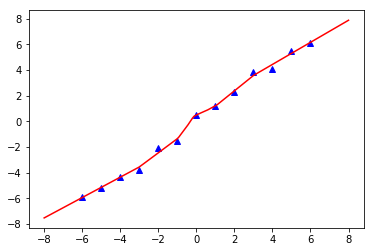

In [4]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(30000):
    c_ , _ = sess.run([loss, train], feed_dict={x:x_train, y:y_train})
    # draw    
    if step%1000 == 0:
        print("loss: ", c_)
        x_draw = np.linspace(-8, 8, 200)[:,np.newaxis]
        y_draw = sess.run(predict, feed_dict={x:x_draw})
        plt.cla()
        plt.plot(x_train, y_train, "b^")
        plt.plot(x_draw, y_draw, "r-")
        plt.pause(0.1)

## 預測新資料

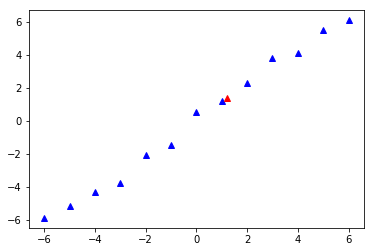

In [5]:
x_new = [[1.2]]
y_new = sess.run(predict, feed_dict={x:x_new})

# draw
plt.cla()
plt.plot(x_train, y_train, "b^")
plt.plot(x_new, y_new, "r^")
plt.show()